# Presto
## A sheet music interpreter for novice music learners
### By Elisabeth Holm and Bryant Perkins

Note: compatible with Python 3.9 or above

### User-Intialized global variables

In [256]:
# image file to process
input_file = 'sheet_music/Mary_Had_A_Little_Lamb.png'  # good for line id, can id most notes
# input_file = 'sheet_music/The_Entertainer.png' # works terribly for remove_horizontal2 but can somewhat id notes
# input_file = 'sheet_music/Somebody_to_love.png'  # great for note id without processing
# input_file = 'sheet_music/Irish_Washerwoman.jpeg'

# User-identified key signature
key_signtaure = "C"  
time_signature = (4, 4)  #4/4 time signature

### Import necessary libraries

In [257]:
# Setup
import preprocess as pp
import interpret as interp
import annotate as anno
import musics
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (25.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [258]:
# check correct file type 
# note: currently only accepts image filetypes that cv2.imread supports, 
# found here https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html

filename, file_ext = os.path.splitext(input_file)

if file_ext not in ['.png', '.jpeg', '.jpg']:
    raise Exception(f"Incorrectly formatted input file \"{input_file}\". Please input an image. \n \nIf you have a pdf, you can easily convert it to a png through the following site: https://pdf2png.com/ \n \nIf you have a physical copy, use a photo scanning app such as the notes app to create a PDF, then convert to an image file (eg png).")

### Preprocess image
Filter image, find staff lines and notes, gather useful data from image

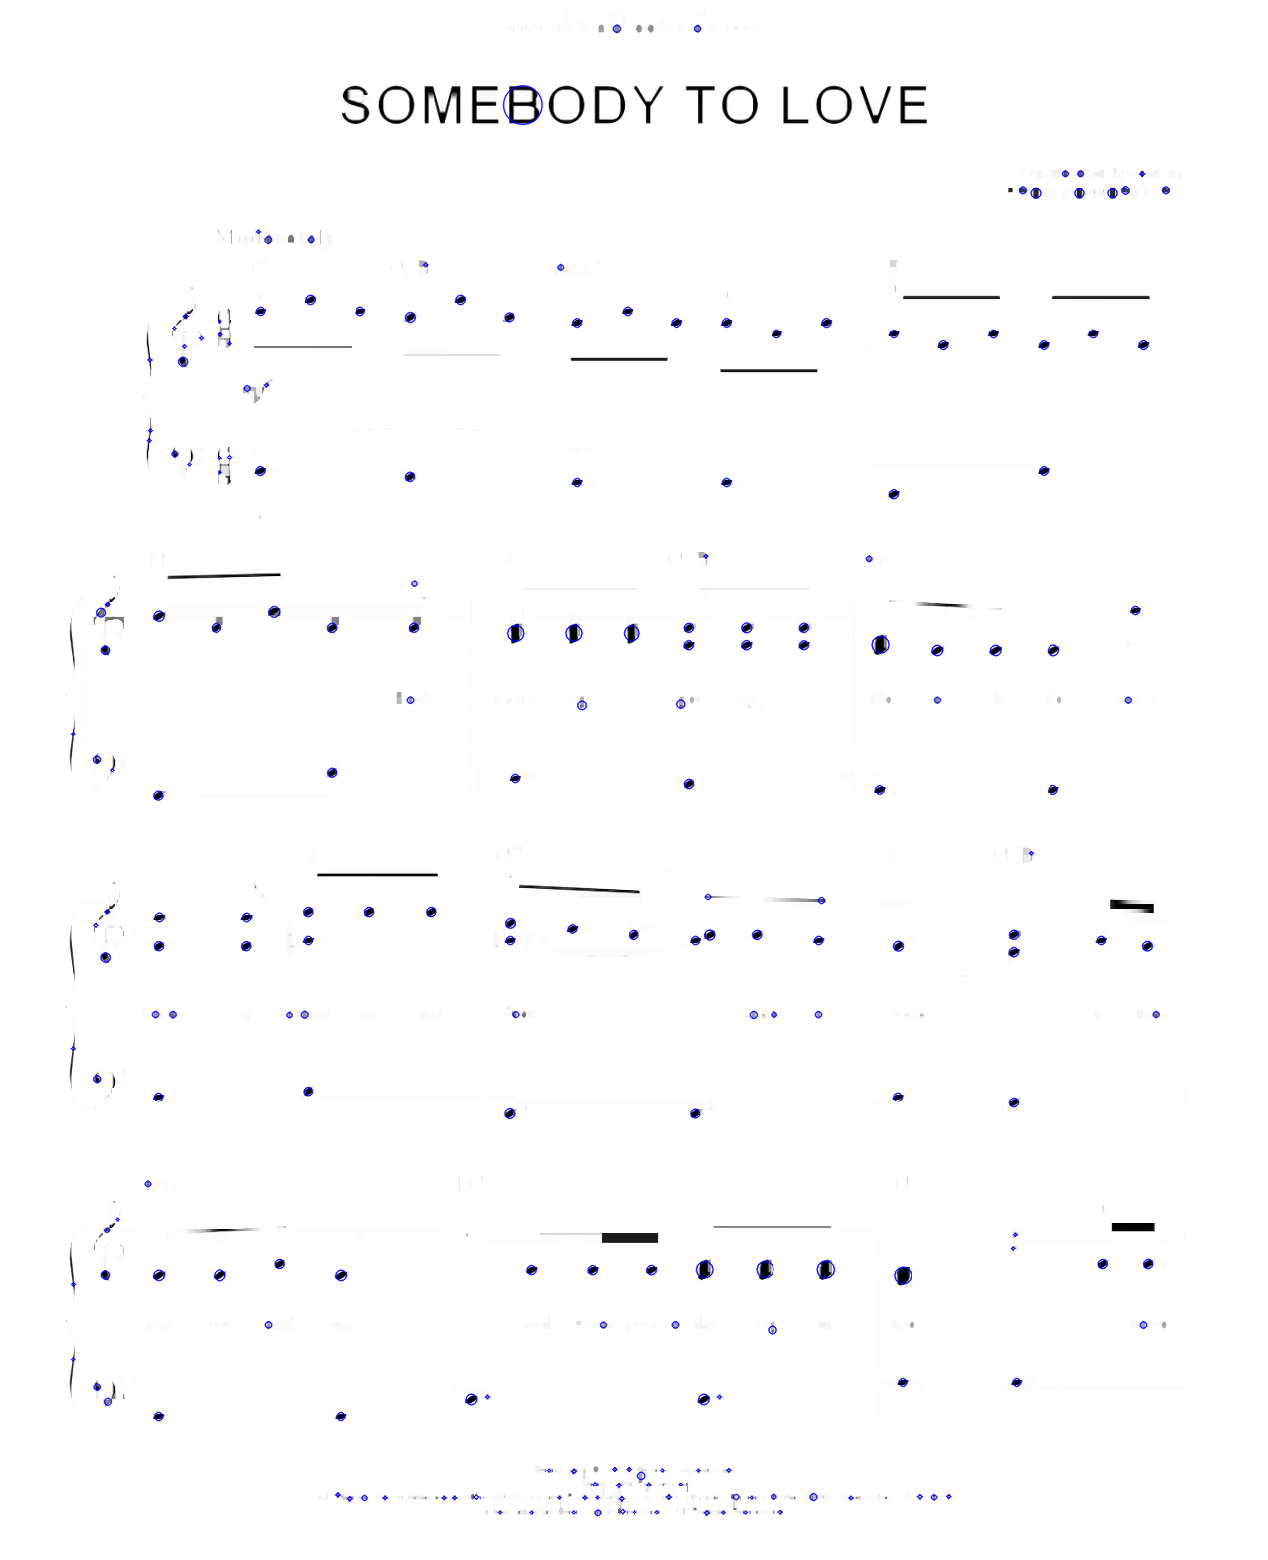

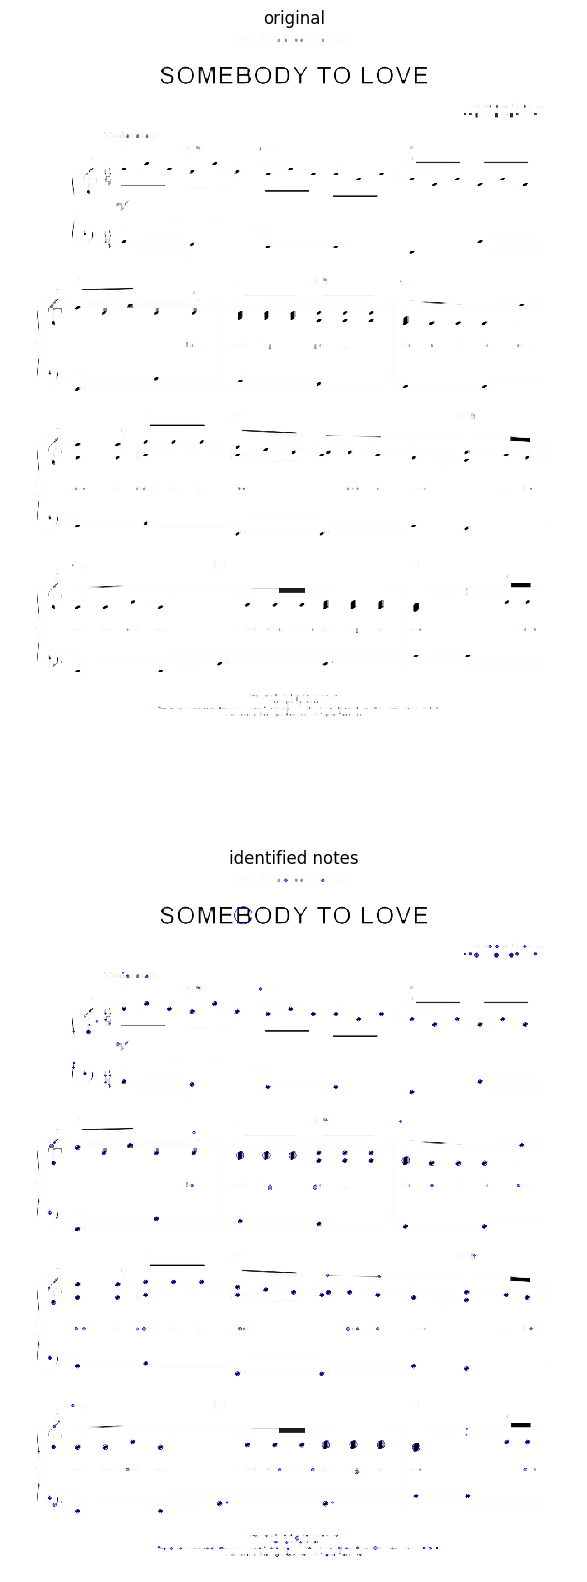

found 221 notes
332.434326171875 1417.00146484375
149.27342224121094 1417.0062255859375
698.360595703125 1399.9888916015625
463.8726501464844 1400.0069580078125
1013.2843627929688 1382.9677734375
898.4808349609375 1382.9720458984375
62.83563232421875 1359.9862060546875
63.0 1283.8619384765625
332.5945129394531 1274.9251708984375
210.78684997558594 1274.8543701171875
149.59226989746094 1274.852783203125
898.8654174804688 1275.063232421875
646.0316162109375 1269.633056640625
586.3171997070312 1269.6265869140625
525.1343994140625 1269.6142578125
1145.68212890625 1263.505126953125
1100.2528076171875 1263.5255126953125
271.1906433105469 1263.50048828125
689.8567504882812 1111.9720458984375
1010.4697265625 1100.528076171875
893.6168823242188 1094.979736328125
149.0400848388672 1094.9903564453125
299.7877197265625 1089.1693115234375
62.78361129760742 1046.1639404296875
1010.3809204101562 948.7179565429688
1144.9161376953125 942.708251953125
893.9872436523438 942.6951293945312
237.754547119140

In [259]:
# reads input file as a numpy image
# returns various forms of the image (original, gray, gaussian smoothed, black and white)
orig_img, img, smoothed, black_white = pp.filter_img(input_file)

# identify horizontal staff lines
hor_lines = pp.horizontal_canny(img.copy())
base_lines, gap_size = pp.get_base_lines(img, hor_lines)

# take staff lines out of image
# img_no_horizontal = pp.remove_horizontal(img)
img_no_horizontal = pp.remove_horizontal2(orig_img, img)
img_no_hor_no_ver = pp.remove_vertical(img_no_horizontal)

# Finds blobs of notes in image
# blobs = pp.find_blobs(img_no_horizontal, display=True)
blobs = pp.find_blobs(img_no_hor_no_ver, display=True)

# create note objects and assign x, y attributes
note_objs = pp.create_note_objs(blobs)
print(f'found {len(note_objs)} notes')
for note in note_objs:
    print(note.x, note.y)

# crop all blobs to images of individual notes
# return list of cropped images
cropped_note_imgs = pp.get_cropped_notes(blobs, img_no_horizontal, save=False)

### Interpret
Interpret gathered staff and note data, turning positional pixel data into musical notation

x: 692.0643310546875, y: 18.16958999633789, note: N
x: 610.3494262695312, y: 18.317829132080078, note: N
x: 516.3237915039062, y: 95.5617446899414, note: N
x: 1078.1123046875, y: 164.28062438964844, note: N
x: 1062.9317626953125, y: 164.31517028808594, note: N
x: 1139.73388671875, y: 164.41993713378906, note: N
x: 1019.4320678710938, y: 180.8231964111328, note: N
x: 1163.4183349609375, y: 180.82852172851562, note: N
x: 1122.976318359375, y: 181.0139617919922, note: N
x: 1110.0828857421875, y: 183.6175537109375, note: N
x: 1076.961181640625, y: 183.6457977294922, note: N
x: 1032.572021484375, y: 183.66567993164062, note: N
x: 250.0, y: 223.266845703125, note: N
x: 302.5281982421875, y: 231.47543334960938, note: N
x: 259.7225036621094, y: 231.57496643066406, note: N
x: 418.1961669921875, y: 256.3646240234375, note: N
x: 554.3265380859375, y: 259.0304260253906, note: N
x: 302.0724182128906, y: 291.46234130859375, note: G
x: 453.0845947265625, y: 291.46441650390625, note: G
x: 252.13224792

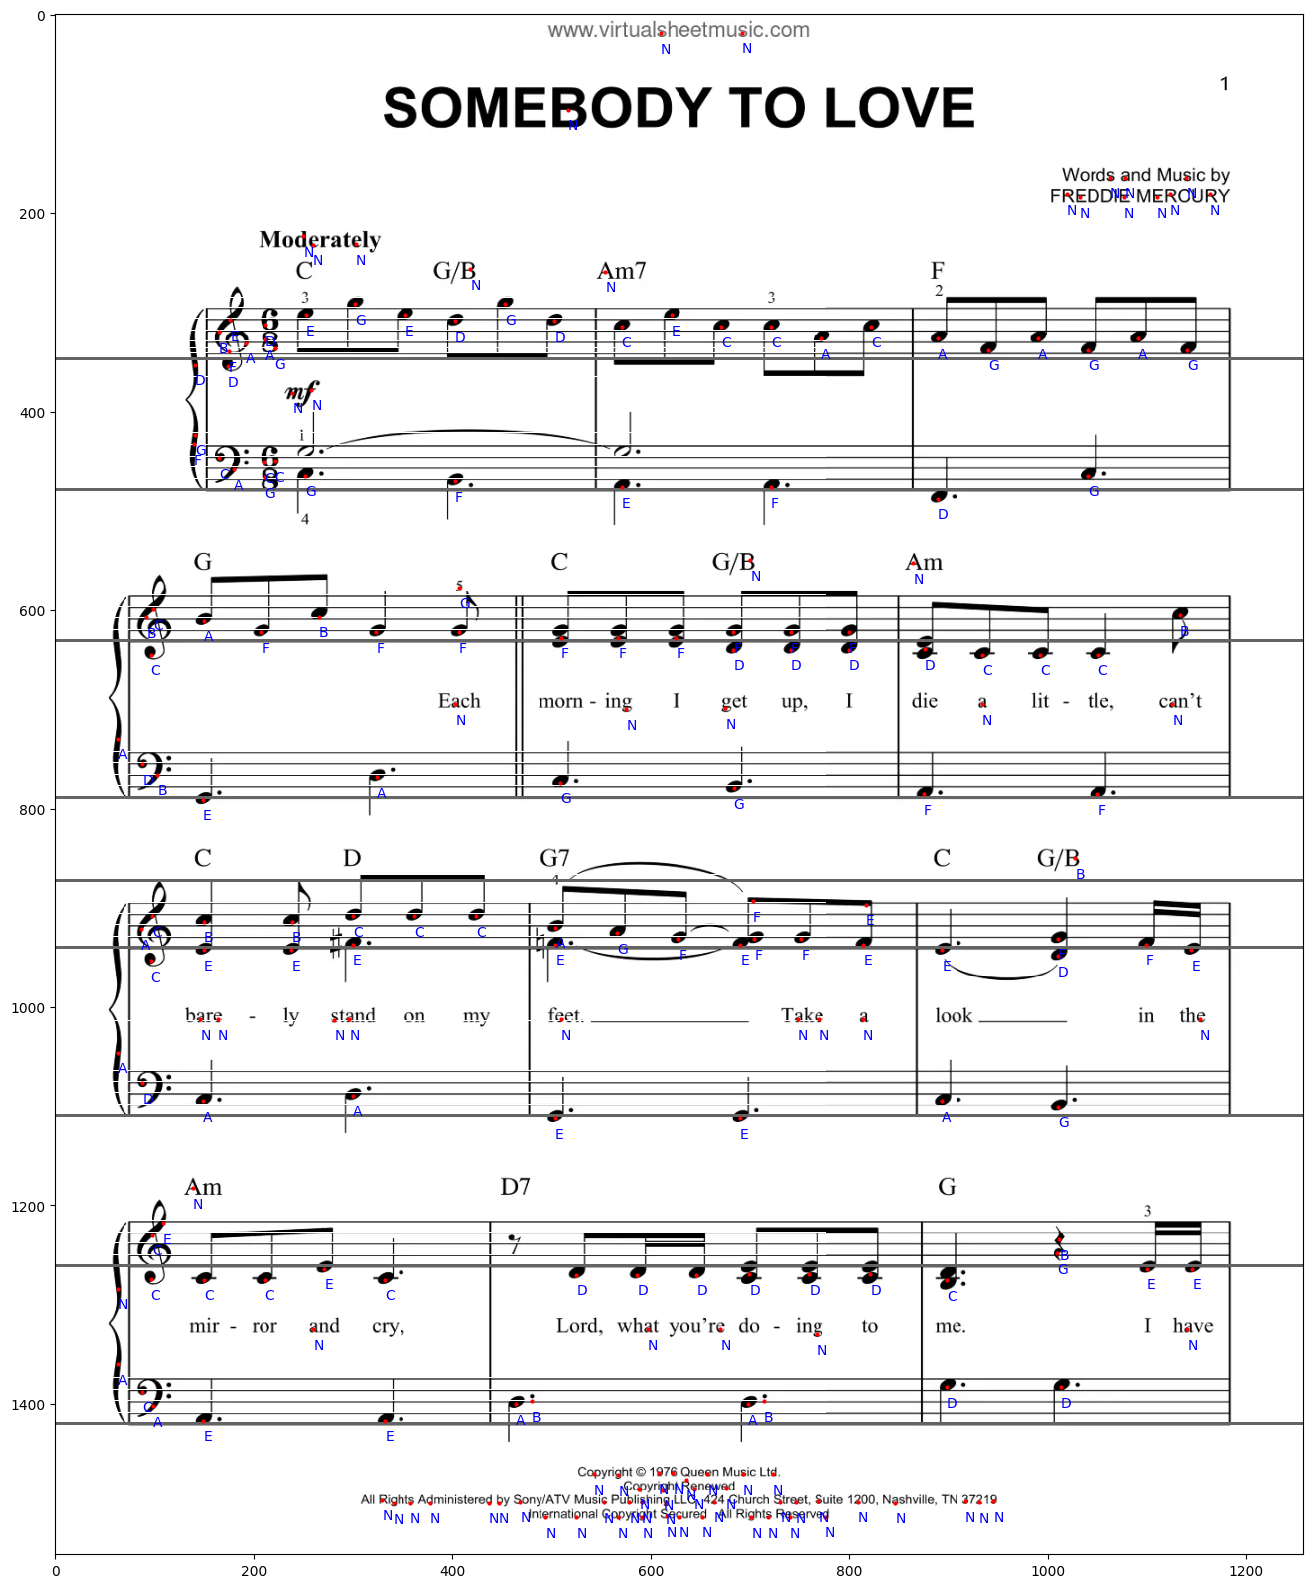

In [260]:
# elisabeth's copy for testing
interp.config_notes(base_lines, note_objs, gap_size)

for note in note_objs:
    print(f"x: {note.x}, y: {note.y}, note: {note.key}")
    plt.plot(note.x, note.y, 'ro', markersize=2)
    plt.text(note.x, note.y + 20, note.key, color="blue")

test = img.copy()
for line in base_lines:
    cv2.line(test, (0, line), (2000, line), (100, 100, 0), 2)

plt.imshow(test)

# TODO uncomment when ready to work on this part of project
# load trained YOLO model
# model = interp.initialize_model()
# predict time of all notes
# interp.set_note_times(model, cropped_note_imgs, note_objs)

x: 700, y: 510, note: F
x: 800, y: 520, note: E
x: 700, y: 531, note: D
x: 800, y: 541, note: C
x: 700, y: 552, note: B
x: 800, y: 562, note: A
x: 700, y: 573, note: G
x: 800, y: 583, note: F
x: 700, y: 594, note: E
x: 800, y: 604, note: D
x: 700, y: 615, note: C
x: 800, y: 625, note: N
x: 700, y: 636, note: N
x: 800, y: 646, note: N


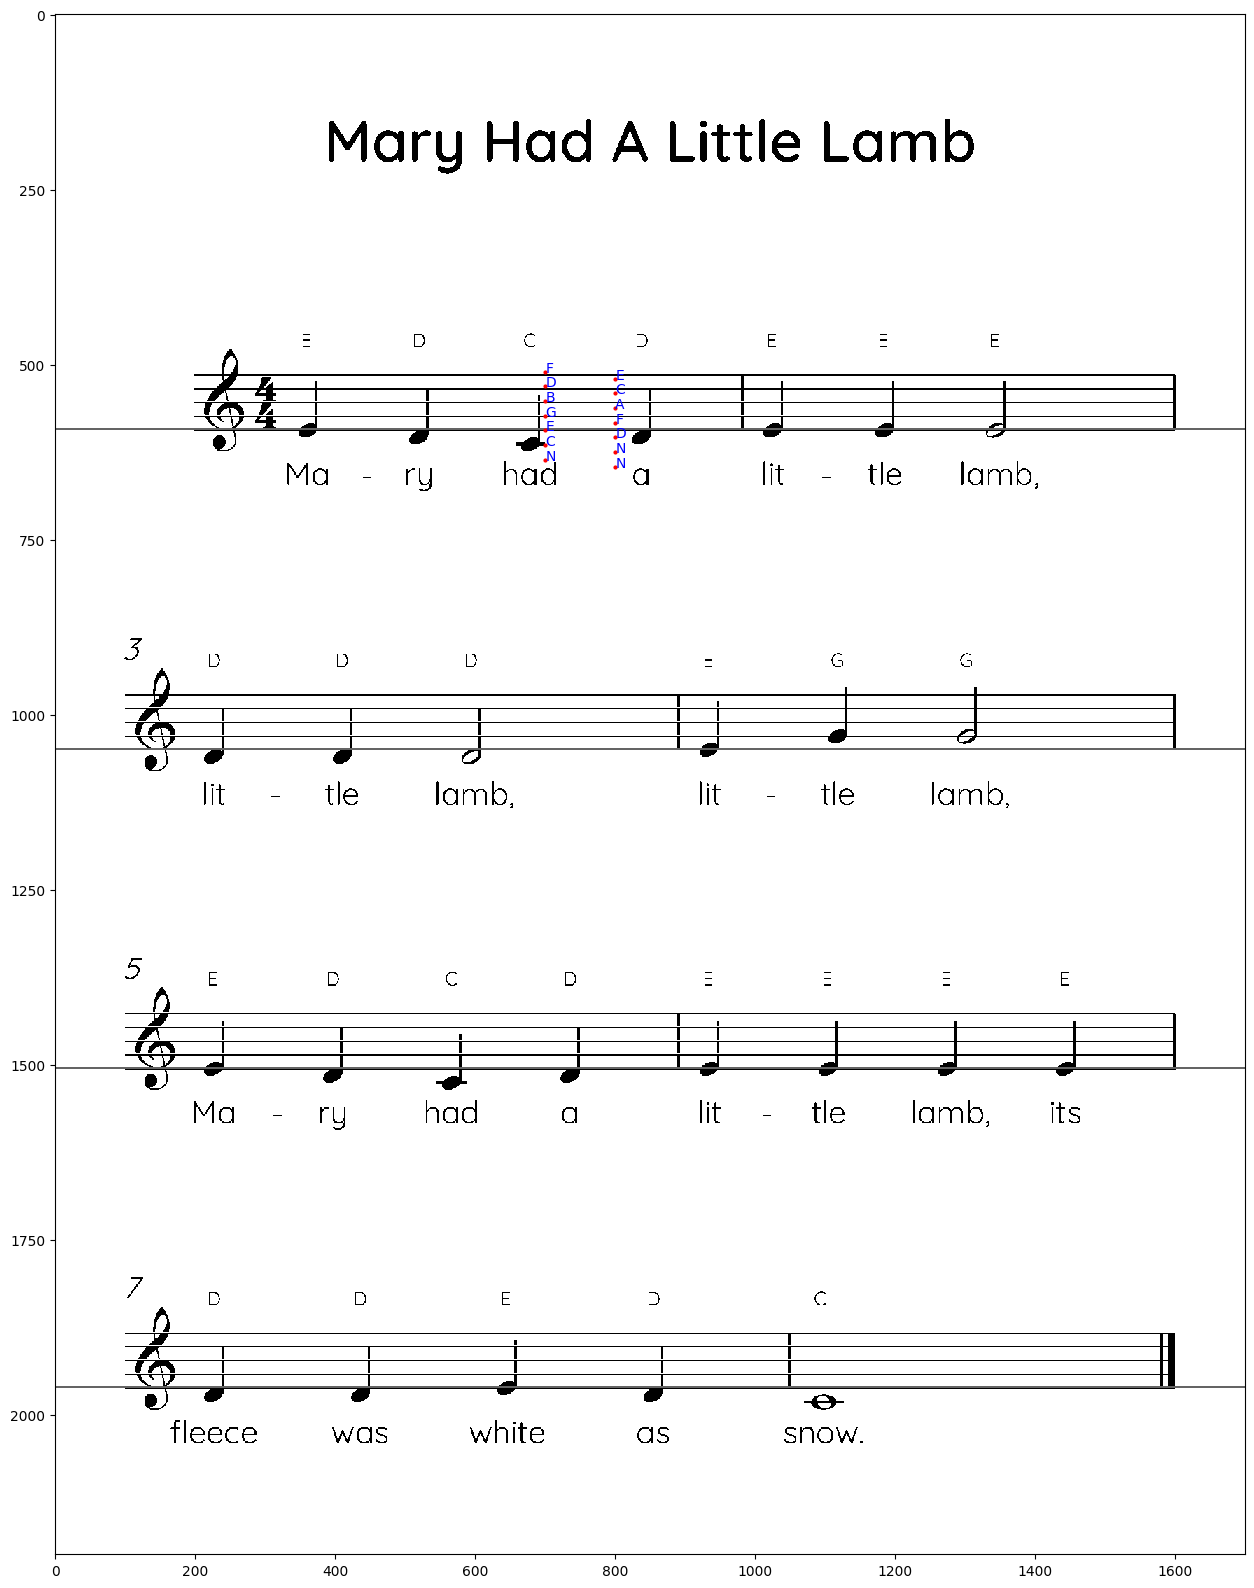

In [226]:
# bryant's copy
test_blobs = [(700, i) for i in range(510, 650, 21)]
test_blobs += [(800, i) for i in range(520, 650, 21)]

note_set = [musics.Note(b[0], b[1]) for b in test_blobs]
interp.config_notes(base_lines, note_set, gap_size)

for note in note_set:
    print(f"x: {note.x}, y: {note.y}, note: {note.key}")
    plt.plot(note.x, note.y, 'ro', markersize=2)
    plt.text(note.x, note.y, note.key, color="blue")

test = img.copy()
for line in base_lines:
    cv2.line(test, (0, line), (2000, line), (100, 100, 0), 2)

plt.imshow(test)

# TODO uncomment when ready to work on this part of project
# load trained YOLO model
# model = interp.initialize_model()
# predict time of all notes
# interp.set_note_times(model, cropped_note_imgs, note_objs)

### Annotate
Annotate the original image file with interpreted note letters, giving the user back an annotated file and MIDI audio file to practice with

In [ ]:
# TODO call annotate (ann) funcs
